 # **Proyecto 4: Clasificación de señales ECG**

### Andres Banquez - Melina Villada

### *Objetivos:*

Extraer características de señales que permitan construir sistemas de clasificación automática

1. Revisión teórica. Del artículo:
https://www.nature.com/articles/s41598-020-59821-7

Hacer un resumen de la sección extracción de caracteríticas (Features extraction) y discutir desde el artículo u otras referencias como se hace cuando desaparecen ciertas formas de ondas en el complejo PQRS debido a alguna enfermedad (10%)

La  estrategia más común es extraer características como magnitudes de picos, duración, distancias entre picos y su variabilidad en los cuatro componentes principales de los latidos: onda P, onda Q, onda T y el complejo QRS. Sin embargo, estas características no proporcionan información suficiente para una clasificación de alta precisión de varios tipos de arritmias, especialmente las caracterizadas por distorsión o ausencia completa de algunos componentes. Por ejemplo, en las ondas P de la fibrilación auricular (AFIB) y el aleteo auricular (AFL), comúnmente son reemplazadas por múltiples ondas de aleteo y fibrilación que son más bajas en amplitud y no corresponden al ritmo QRS. Además, el uso de Transformación Wavelet o Transformación Rápida de Fourier para extraer características de frecuencia descuida la información del dominio del tiempo.

En el artículo, se diseñó un método novedoso e interpretable de extracción de características. Como parte de la comparación de esquemas de clasificación en múltiples etapas, se realizó un análisis de enfoques de selección de características que incluyó un total de 11 escenarios distintos. El primer y más simple conjunto de características solo incluía 11 características básicas de la señal, mientras que el último y más exhaustivo conjunto incluía 39,830 características. Agregaron la edad y el género como características debido a su importancia en casi todos los análisis de datos médicos. También se incluyeron otras características significativas como la media y la varianza de los intervalos RR, así como los conteos de intervalos RR que solo se calculan en el ECG de la derivación II.

El Grupo de Características 1 incluye: frecuencia ventricular en latidos por minuto (BPM), frecuencia auricular en BPM, duración del QRS en milisegundos, intervalo QT en milisegundos, eje R, eje T, conteo de QRS, inicio de Q, final de Q, en total 11 variables. El Grupo de Características 2 incluye: media y varianza de los intervalos RR, conteo de intervalos RR, media y varianza de la altura, anchura y prominencia del complejo QRS, picos no QRS y valles en el ECG de la derivación II, en total 23 variables.

Los picos y valles se asignaron a 3 subconjuntos: complejo QRS, picos no QRS y valles. Así, se midieron las relaciones entre picos y valles en 6 combinaciones de pares distintas. Para las 6 combinaciones de pares mencionadas, se calcula la relación entre la diferencia de anchura y la diferencia de tiempo, la relación entre la diferencia de altura y la diferencia de tiempo, y la relación entre la diferencia de prominencia y la diferencia de tiempo. 

El Grupo de Características 6 está diseñado para el ECG de la derivación II y consta de un total de 900 frecuencias de altura, anchura y prominencia para el complejo QRS, picos no QRS y valles; un total de 600 frecuencias de diferencia de ubicación; y un total de 1800 frecuencias de la relación entre diferencia de anchura y diferencia de tiempo, la relación entre diferencia de altura y diferencia de tiempo, y la relación entre diferencia de prominencia y diferencia de tiempo.

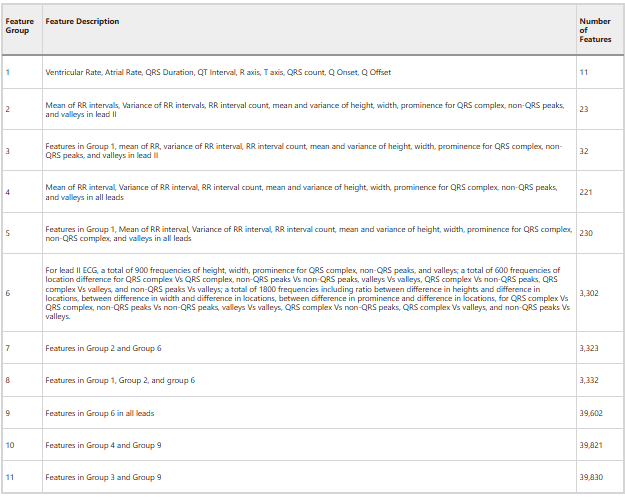

**Tabla 1.** Feature groups table.

Cuando ciertas formas de ondas en el complejo PQRS desaparecen debido a una enfermedad, se enfrenta un desafío significativo en la clasificación de arritmias. Las ondas del ECG, como la onda P, el complejo QRS y la onda T, son fundamentales para interpretar la actividad eléctrica del corazón y diagnosticar diversas condiciones cardíacas. La desaparición o distorsión de estas ondas puede complicar este proceso. A continuación, se discuten algunos enfoques y estrategias utilizados para manejar esta situación, tanto desde el artículo mencionado como de otras referencias relevantes:

Estrategias de Manejo y Clasificación
Extracción de Características Alternativas:

* Análisis de Intervalos RR: Cuando las ondas específicas desaparecen, se puede recurrir al análisis de intervalos RR (el tiempo entre dos complejos QRS sucesivos) y sus variaciones. Esto puede proporcionar información sobre la regularidad y el ritmo cardíaco, crucial para identificar arritmias como la fibrilación auricular (AFIB), donde las ondas P suelen estar ausentes o son reemplazadas por ondas de fibrilación.[1]

* Duración y Morfología del Complejo QRS: En caso de desaparición de la onda P o T, el complejo QRS puede ser analizado en términos de su duración y morfología. La duración prolongada del QRS puede indicar bloqueos de rama u otros trastornos de conducción. [2]

* Transformada de Fourier y Wavelet: Estas técnicas pueden ser utilizadas para analizar la frecuencia de las señales del ECG. Aunque estas transformaciones pueden perder información del dominio del tiempo, pueden ayudar a detectar patrones de frecuencia anormales asociados con ciertas arritmias.

2. Base de datos. Del proyecto pasado hay dos opciones de base de datos, la filtrada por los autores o la filtrada en el proyecto 3. De acuerdo a los resultados del proyecto 3 usar la mejor base de datos y justificar la selección
De la base de datos extraer los registros que correspondan a bradicardia sinusal (SB Sinus Bradycardia) y fibrilación auricular (AFIB Atrial Fibrillation). Esta información está en el archivo Diagnostics.xlsx De estos registros los análisis para el presente proyecto deben hacerse en la derivación II

3. Herramientas computacionales. Hacer un minitutorial del uso de la herramienta NeuroKit (https://neuropsychology.github.io/NeuroKit/index.html) orientado al análisis de señales ECG (10%)

3.1 Se realiza la instalción de la libreria con:

In [112]:
!pip install neurokit2


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


3.2 Una vez instalado, importa las librerías necesarias:

In [1]:
import neurokit2 as nk
import pandas as pd
import matplotlib.pyplot as plt

3.3.Cargar una señal ECG, puedes utilizar tus propios datos o generar una señal sintética

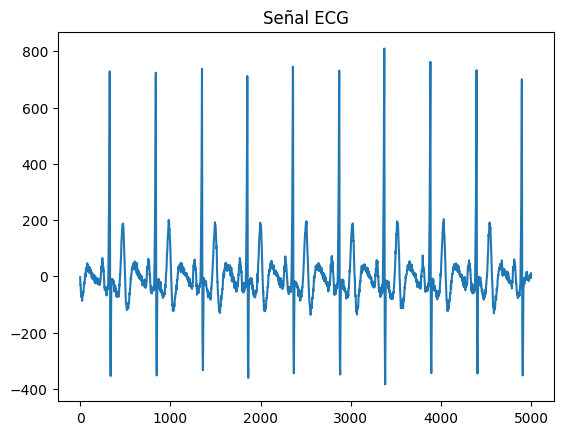

In [114]:
# Cargar señal 
ecg_signal = pd.read_csv("Derivacion_II_Filtrados\MUSE_20180112_122550_52000_derivacion_II.csv")
ecg_signal=ecg_signal.values.flatten()
ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=100)

# Visualizar la señal
plt.plot(ecg_cleaned)
plt.title("Señal ECG")
plt.show()


3.4 NeuroKit proporciona funciones para procesar la señal ECG y extraer características importantes. El procesamiento básico incluye la detección de los picos R y la extracción de intervalos RR.

{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 323,  834, 1346, 1848, 2355, 2867, 3367, 3878, 4390, 4892]), 'ECG_R_Peaks_Uncorrected': array([ 323,  834, 1346, 1848, 2355, 2867, 3367, 3878, 4390, 4892]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([0.50766667, 0.511     , 0.512     , 0.502     , 0.507     ,
       0.512     , 0.5       , 0.511     , 0.512     , 0.502     ]), 'ECG_fixpeaks_drrs': array([-0.02877211,  0.15232292,  0.04569688, -0.45696877,  0.22848439,
        0.22848439, -0.54836253,  0.50266565,  0.04569688, -0.45696877]), 'ECG_fixpeaks_mrrs': array([-0.14378145,  0.14378145,  0.11502516, -0.77641984, -0.20129403,
        0.11502516, -0.94895758,  0.08626887,  0.21567218, -0.6038821 ]), 'ECG_fixpeaks_s12': array([0.15232292, 0.04569688, 0.15232292, 0.04569688, 0.22848439,
       0.22848439, 0.22848439, 0.04569688, 0

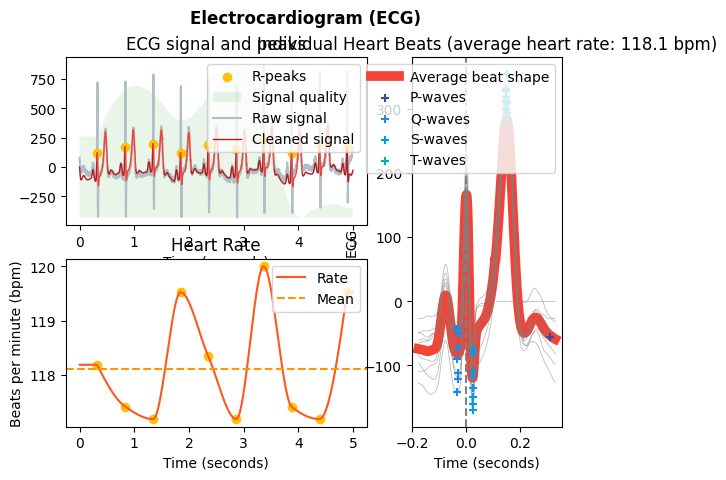

In [115]:
# Procesar la señal ECG
ecg_signals, info = nk.ecg_process(ecg_signal)

# Visualizar el procesamiento
nk.ecg_plot(ecg_signals)

print(info)


{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 328,  384,  451,  630,  839, 1213, 1292, 1351, 1513, 1735, 1853,
       1966, 2275, 2359, 2772, 3185, 3372, 3497, 3578, 3652, 3776, 3883,
       3956, 4110, 4267, 4395, 4675, 4736, 4897, 4954]), 'ECG_R_Peaks_Uncorrected': array([ 328,  384,  451,  630,  839, 1213, 1292, 1351, 1513, 1735, 1853,
       1966, 2275, 2359, 2872, 3185, 3372, 3497, 3578, 3652, 3776, 3883,
       3956, 4110, 4267, 4395, 4675, 4736, 4897, 4954]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([1.59517241, 0.56      , 0.67      , 1.79      , 2.09      ,
       3.74      , 0.79      , 0.59      , 1.62      , 2.22      ,
       1.18      , 1.13      , 3.09      , 0.84      , 4.13      ,
       4.13      , 1.87      , 1.25      , 0.81      , 0.74      ,
       1.24      , 1.07      , 0.73      , 1.54      , 1.57      

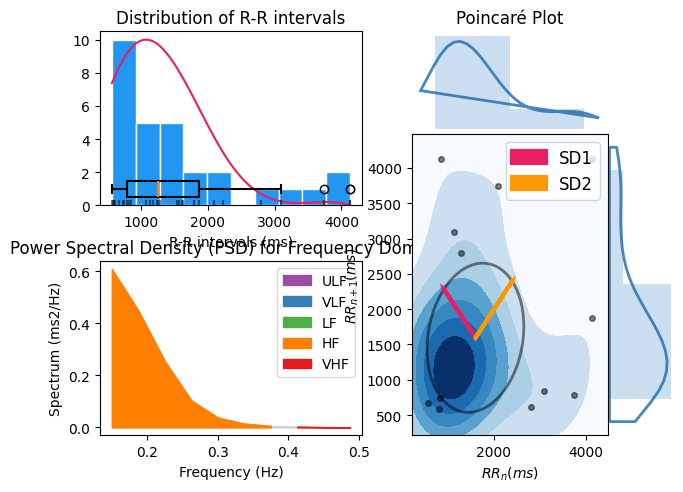

In [116]:
peaks, info = nk.ecg_peaks(ecg_cleaned, sampling_rate=100, correct_artifacts=True)
hrv_indices = nk.hrv(peaks, sampling_rate=100, show=True)
print(info)

También permite calcular el hrv (variabilidad de la frecuencia cardíaca)

In [117]:
signals, info = nk.bio_process(ecg_cleaned, sampling_rate=100)

# Get HRV
nk.hrv(signals, sampling_rate=100)



HRV_MeanNN     HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  1986.521739  1029.278691         NaN         NaN         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5    HRV_RMSSD     HRV_SDSD  ...  HRV_SampEn  \
0         NaN         NaN  1385.168188  1417.276212  ...         inf   

   HRV_ShanEn  HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn   HRV_CD  HRV_HFD  \
0    4.436605     1.635391       NaN        NaN         NaN  1.76359   1.9775   

    HRV_KFD  HRV_LZC  
0  3.417819  1.18006  

[1 rows x 82 columns]

Encontrar los picos, por ejemplo P,Q,S T

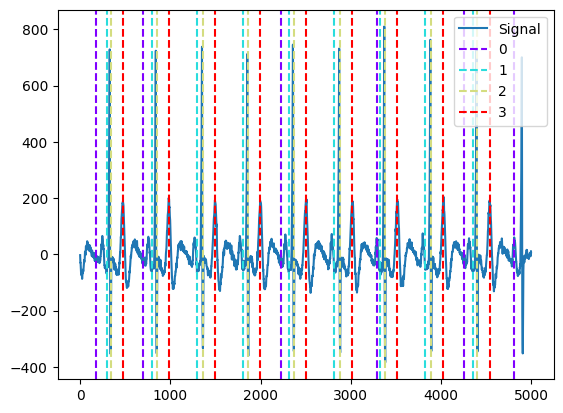

In [118]:
_, rpeaks = nk.ecg_peaks(ecg_cleaned, sampling_rate=1000)
signals, waves = nk.ecg_delineate(ecg_cleaned, rpeaks, sampling_rate=1000)
nk.events_plot([waves["ECG_P_Peaks"], waves["ECG_Q_Peaks"],waves["ECG_S_Peaks"],waves["ECG_T_Peaks"]], ecg_cleaned)

4. Escoger diferentes señales de la base de datos del punto 2 y aplicar el tutorial del punto 3 (5%).

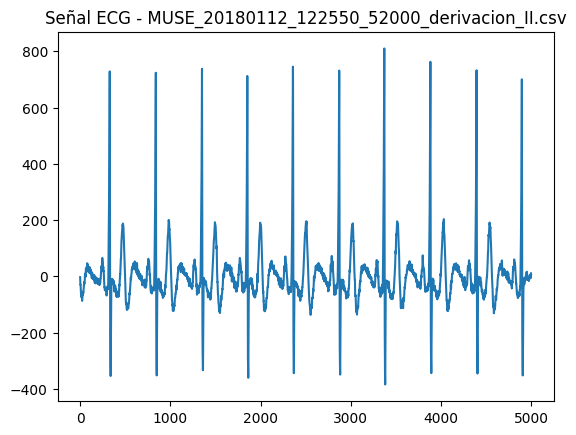

Información del procesamiento para MUSE_20180112_122550_52000_derivacion_II.csv:
{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 323,  834, 1346, 1848, 2355, 2867, 3367, 3878, 4390, 4892]), 'ECG_R_Peaks_Uncorrected': array([ 323,  834, 1346, 1848, 2355, 2867, 3367, 3878, 4390, 4892]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([0.50766667, 0.511     , 0.512     , 0.502     , 0.507     ,
       0.512     , 0.5       , 0.511     , 0.512     , 0.502     ]), 'ECG_fixpeaks_drrs': array([-0.02877211,  0.15232292,  0.04569688, -0.45696877,  0.22848439,
        0.22848439, -0.54836253,  0.50266565,  0.04569688, -0.45696877]), 'ECG_fixpeaks_mrrs': array([-0.14378145,  0.14378145,  0.11502516, -0.77641984, -0.20129403,
        0.11502516, -0.94895758,  0.08626887,  0.21567218, -0.6038821 ]), 'ECG_fixpeaks_s12': array([0.15232292, 0.04569688,

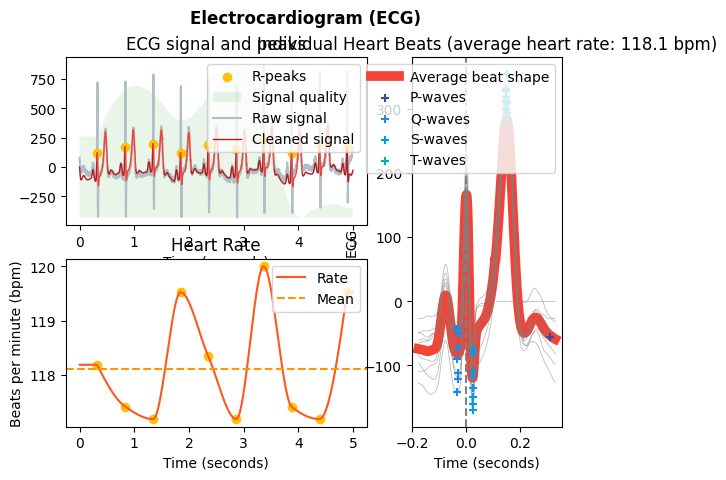

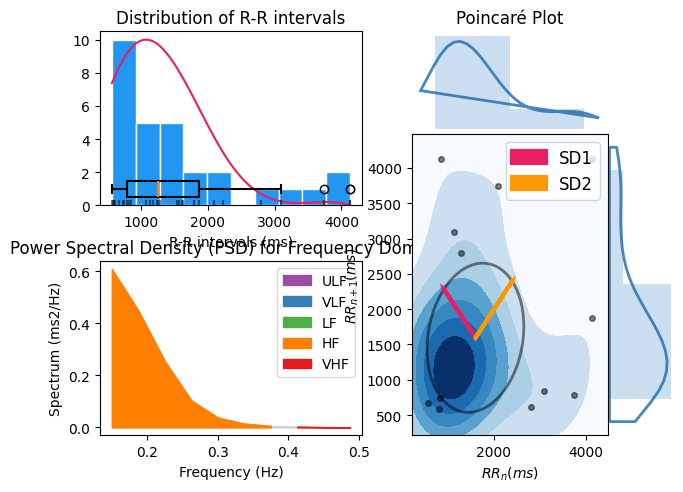

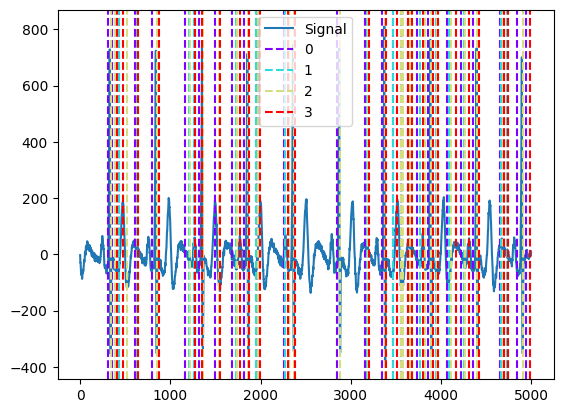

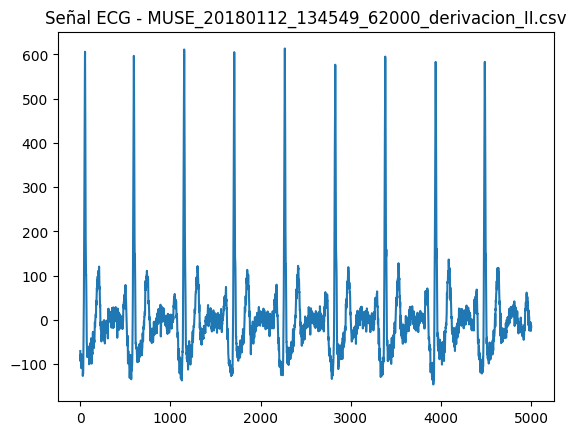

Información del procesamiento para MUSE_20180112_134549_62000_derivacion_II.csv:
{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 595, 1152, 1708, 2268, 2827, 3382, 3941, 4485]), 'ECG_R_Peaks_Uncorrected': array([ 595, 1152, 1708, 2268, 2827, 3382, 3941, 4485]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([0.55571429, 0.557     , 0.556     , 0.56      , 0.559     ,
       0.555     , 0.559     , 0.544     ]), 'ECG_fixpeaks_drrs': array([-0.231051  ,  0.17751479, -0.13806706,  0.55226824, -0.13806706,
       -0.55226824,  0.55226824, -2.07100592]), 'ECG_fixpeaks_mrrs': array([-0.3562753 ,  0.        , -0.22672065,  0.79352227,  0.56680162,
       -0.68016194,  0.4534413 , -6.12145749]), 'ECG_fixpeaks_s12': array([ 0.17751479, -0.13806706,  0.17751479, -0.13806706, -0.55226824,
       -0.13806706, -0.55226824,  0.55226824]), 'ECG_fixpe

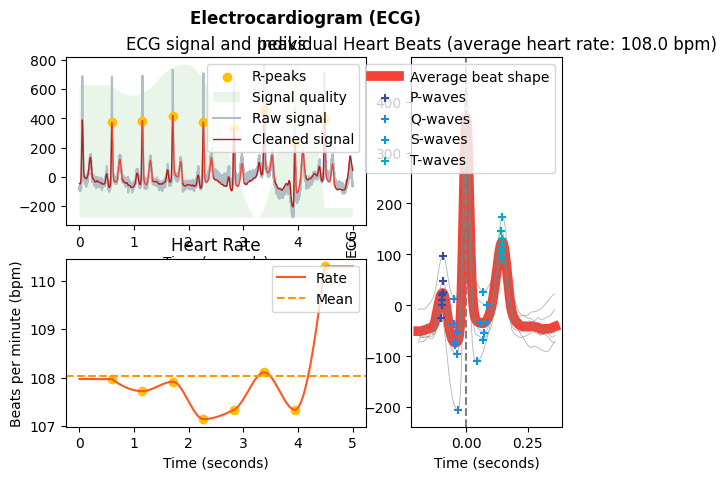

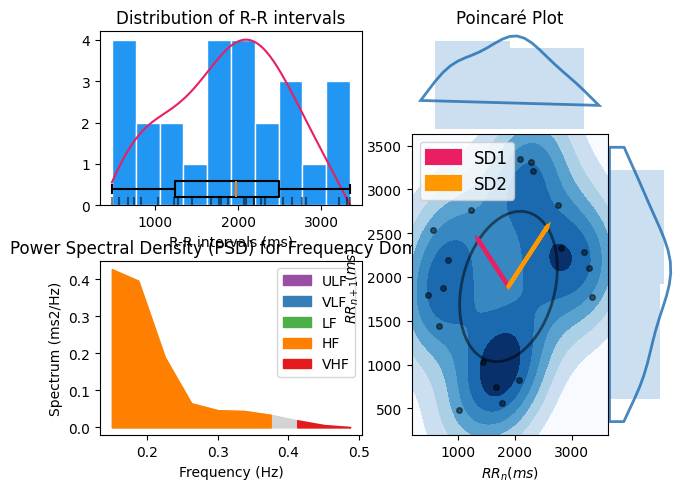

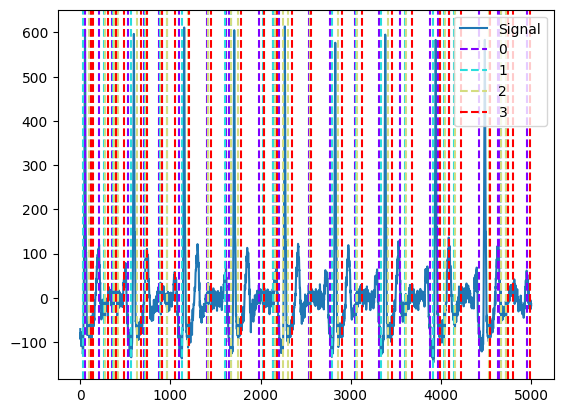

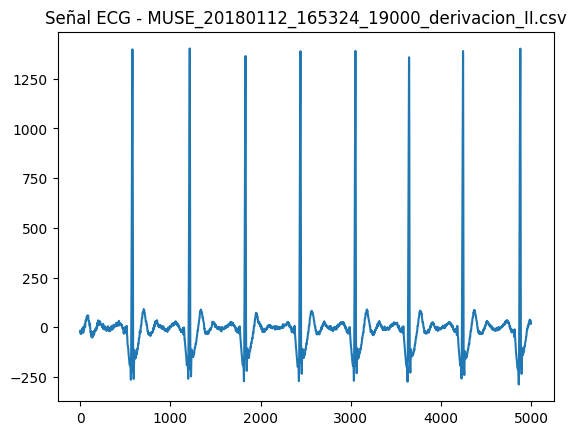

Información del procesamiento para MUSE_20180112_165324_19000_derivacion_II.csv:
{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 578, 1213, 1831, 2441, 3050, 3645, 4243, 4878]), 'ECG_R_Peaks_Uncorrected': array([ 578, 1213, 1831, 2441, 3050, 3645, 4243, 4878]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([0.61428571, 0.635     , 0.618     , 0.61      , 0.609     ,
       0.595     , 0.598     , 0.635     ]), 'ECG_fixpeaks_drrs': array([ 0.07618747,  0.53331232, -0.4376839 , -0.20596889, -0.02574611,
       -0.36044557,  0.07723834,  0.95260614]), 'ECG_fixpeaks_mrrs': array([ 0.04191993,  0.48906588,  0.11458115, -0.08383987, -0.12296514,
       -0.67071893, -0.46950325,  0.4988472 ]), 'ECG_fixpeaks_s12': array([ 0.53331232,  0.07618747, -0.20596889, -0.4376839 , -0.36044557,
       -0.02574611,  0.95260614,  0.07723834]), 'ECG_fixpe

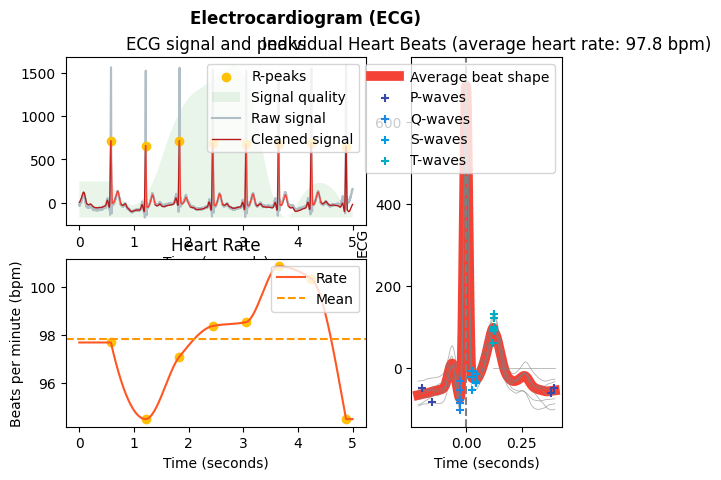

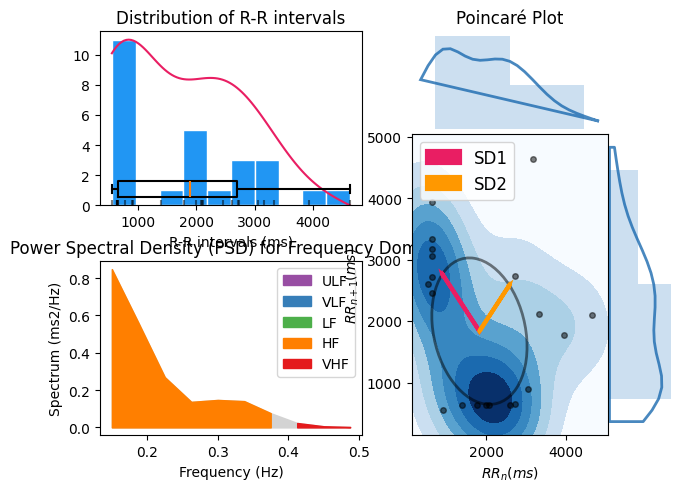

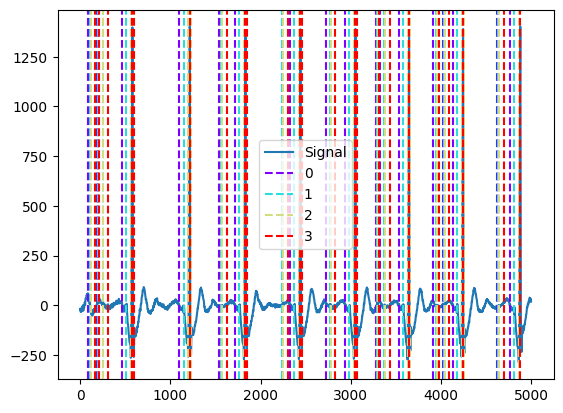

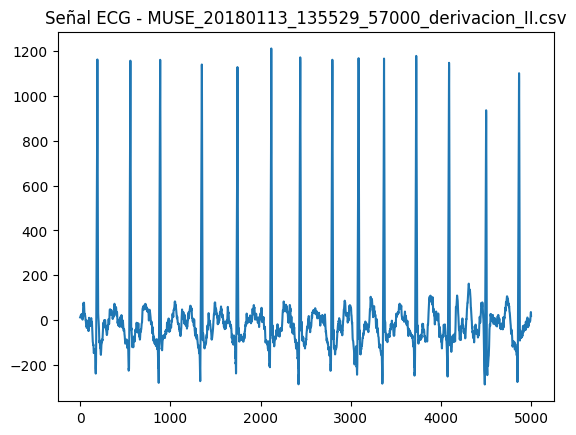

Información del procesamiento para MUSE_20180113_135529_57000_derivacion_II.csv:
{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 556,  887, 1349, 1744, 2119, 2440, 2796, 3082, 3369, 3726, 4090,
       4501, 4866]), 'ECG_R_Peaks_Uncorrected': array([ 556,  887, 1349, 1744, 2119, 2440, 2796, 3369, 3726, 4090, 4501,
       4866]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([0.35916667, 0.331     , 0.462     , 0.395     , 0.375     ,
       0.321     , 0.356     , 0.286     , 0.287     , 0.357     ,
       0.364     , 0.411     , 0.365     ]), 'ECG_fixpeaks_drrs': array([ 0.003978  , -0.23049645,  1.07201309, -0.54828151, -0.16366612,
       -0.44189853,  0.28641571, -0.57283142,  0.00818331,  0.57283142,
        0.05728314,  0.38461538, -0.37643208]), 'ECG_fixpeaks_mrrs': array([-0.09441463, -0.33591731,  0.62263963,  0.23255814,  0.1

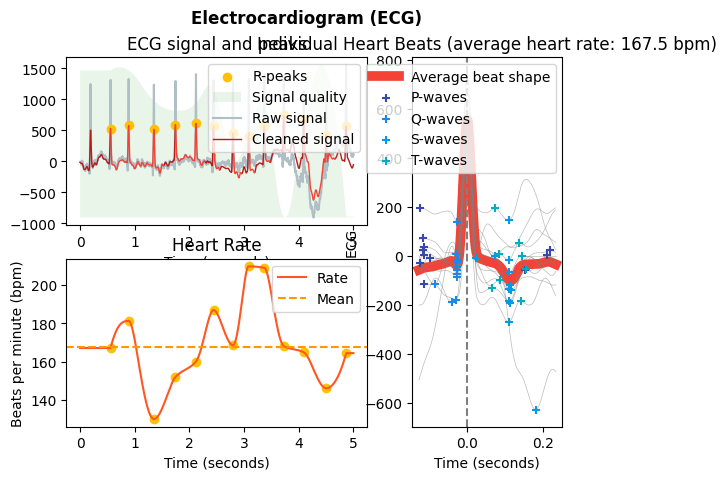

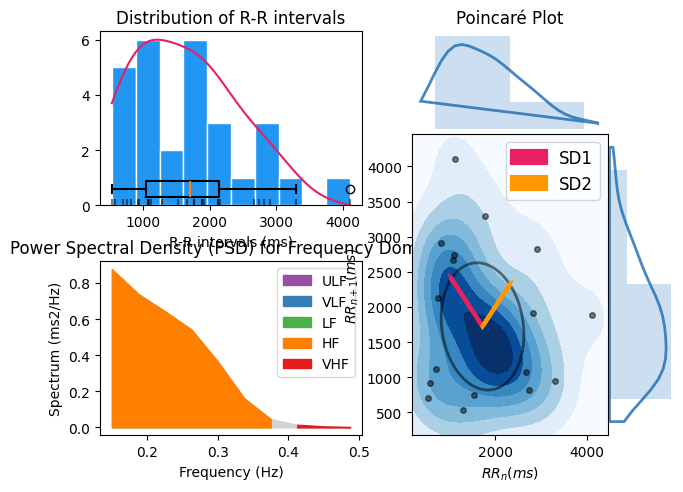

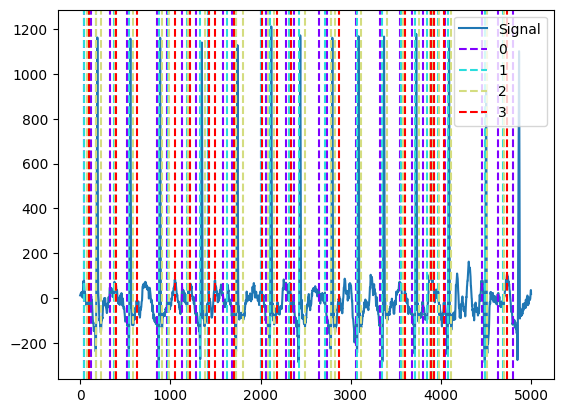

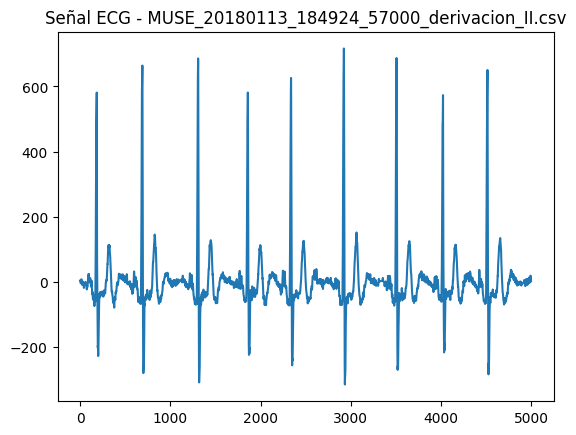

Información del procesamiento para MUSE_20180113_184924_57000_derivacion_II.csv:
{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 686, 1304, 1855, 2334, 2920, 3504, 4019, 4512]), 'ECG_R_Peaks_Uncorrected': array([ 686, 1304, 1855, 2334, 2920, 3504, 4019, 4512]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([0.54657143, 0.618     , 0.551     , 0.479     , 0.586     ,
       0.584     , 0.515     , 0.493     ]), 'ECG_fixpeaks_drrs': array([-0.05537221,  0.51680731, -0.48476526, -0.52094177,  0.77417735,
       -0.0144706 , -0.49923586, -0.15917665]), 'ECG_fixpeaks_mrrs': array([-0.43177129,  0.69112879,  0.02284114, -1.43972885,  0.38387857,
        0.36324786, -0.74270557, -0.82522841]), 'ECG_fixpeaks_s12': array([ 0.51680731, -0.05537221, -0.52094177, -0.48476526, -0.0144706 ,
       -0.49923586, -0.15917665, -0.49923586]), 'ECG_fixpe

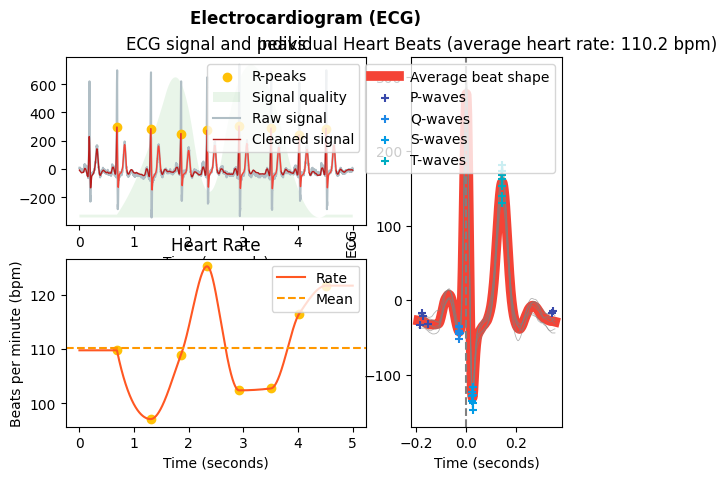

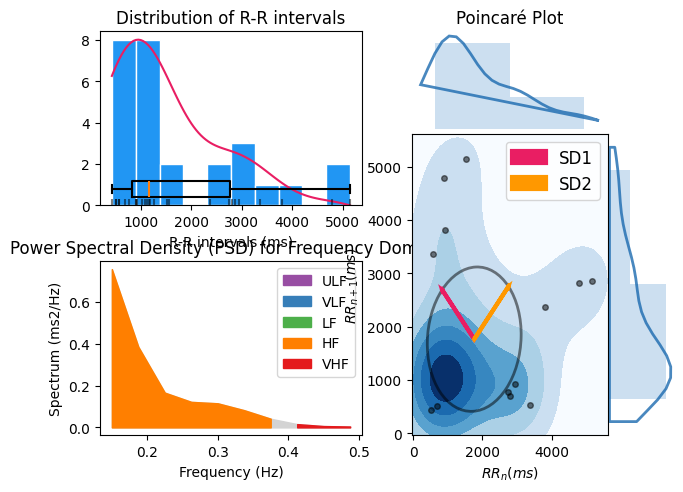

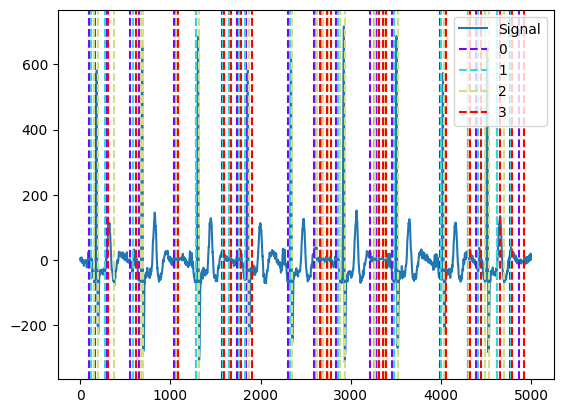

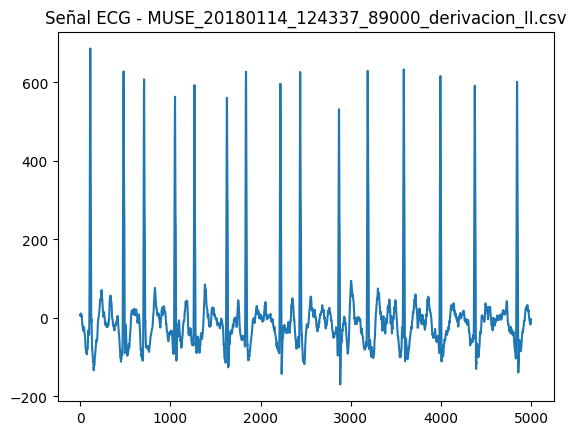

Información del procesamiento para MUSE_20180114_124337_89000_derivacion_II.csv:
{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 482, 1052, 1627, 2220, 2869, 3188, 3588, 3994, 4375, 4844]), 'ECG_R_Peaks_Uncorrected': array([ 482, 1052, 1627, 2220, 2869, 3188, 3588, 3994, 4375, 4844]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([0.48466667, 0.57      , 0.575     , 0.593     , 0.649     ,
       0.319     , 0.4       , 0.406     , 0.381     , 0.469     ]), 'ECG_fixpeaks_drrs': array([-0.00889722,  0.43615299,  0.02555584,  0.09200102,  0.2862254 ,
       -1.68668541,  0.4140046 ,  0.03066701, -0.1277792 ,  0.44978278]), 'ECG_fixpeaks_mrrs': array([-0.6121323 ,  0.        ,  0.16610042,  0.37750094,  0.59993612,
       -1.09997967, -0.48087813, -0.21953132, -0.1742312 ,  0.22998519]), 'ECG_fixpeaks_s12': array([ 0.43615299,  0.0255558

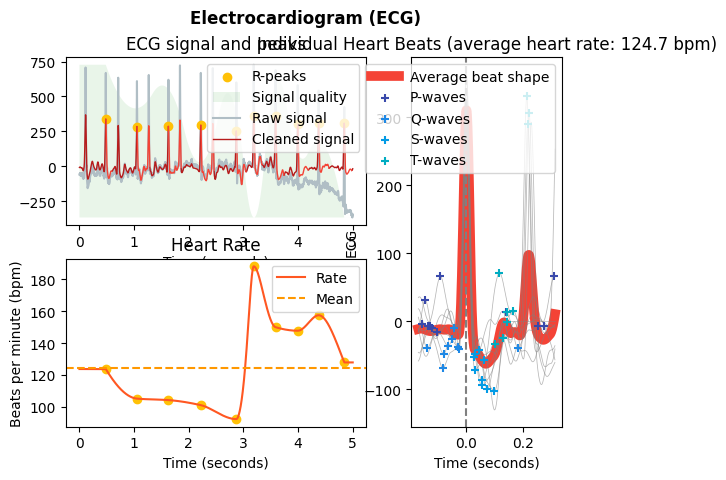

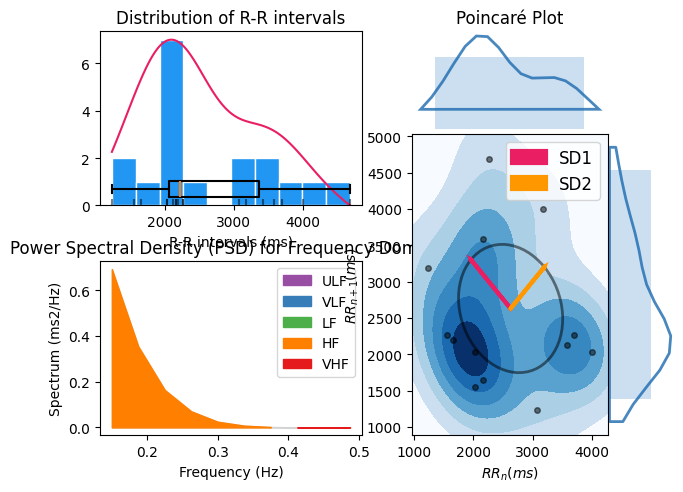

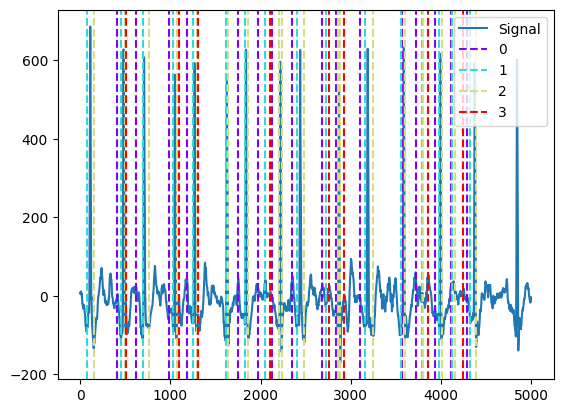

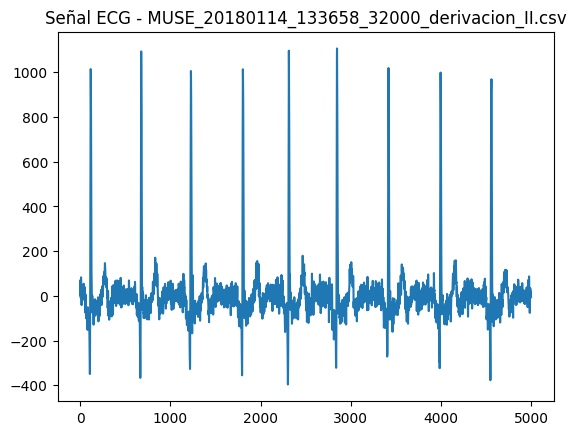

Información del procesamiento para MUSE_20180114_133658_32000_derivacion_II.csv:
{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 679, 1230, 1807, 2328, 2850, 3420, 3998, 4560]), 'ECG_R_Peaks_Uncorrected': array([ 679, 1230, 1807, 2317, 2850, 3420, 3998, 4560]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([0.55442857, 0.551     , 0.577     , 0.521     , 0.522     ,
       0.57      , 0.578     , 0.562     ]), 'ECG_fixpeaks_drrs': array([ 0.01451637, -0.04601416,  0.34894072, -0.75156462,  0.0134208 ,
        0.64419824,  0.10736637, -0.21473275]), 'ECG_fixpeaks_mrrs': array([ 0.02693149, -0.10772597,  0.29512428, -1.16927566, -1.13785558,
        0.18515401,  0.2513606 , -0.1256803 ]), 'ECG_fixpeaks_s12': array([-0.04601416,  0.01451637, -0.04601416,  0.0134208 ,  0.64419824,
        0.10736637,  0.64419824,  0.10736637]), 'ECG_fixpe

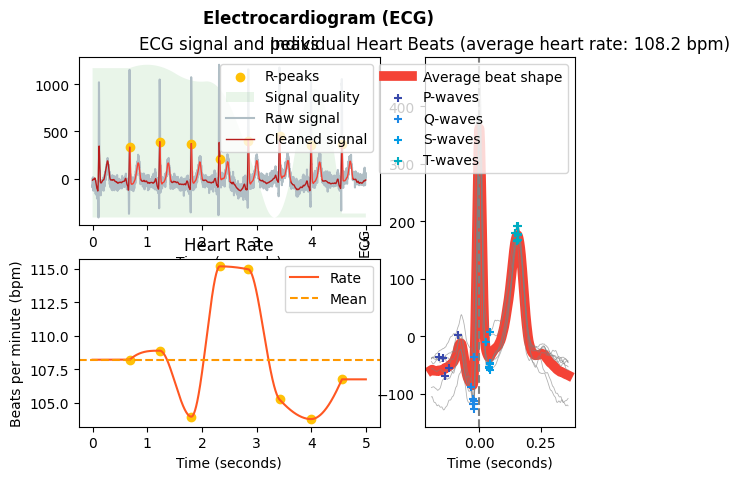

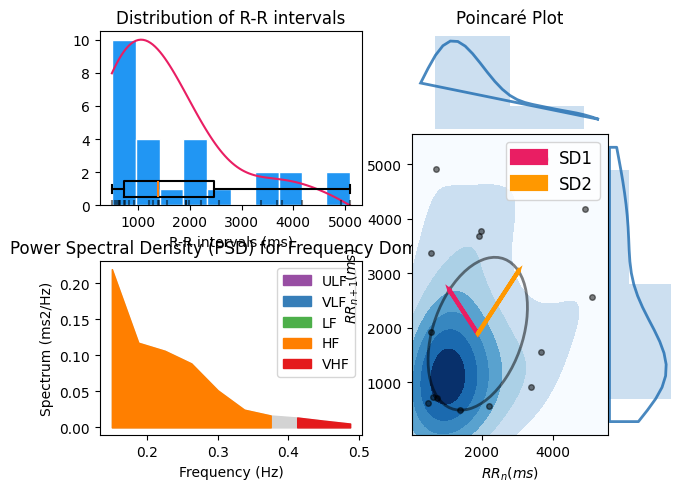

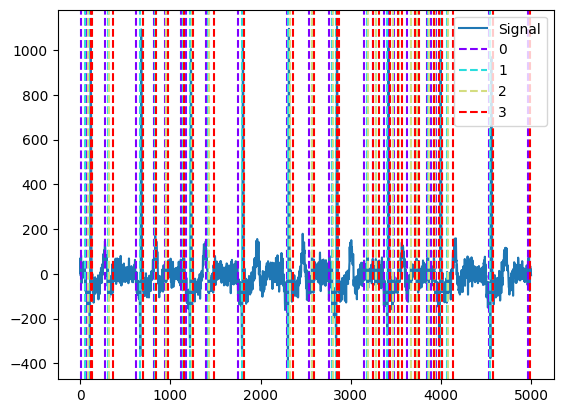

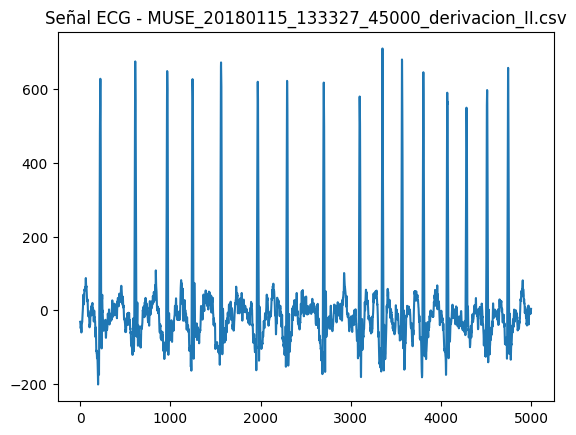

Información del procesamiento para MUSE_20180115_133327_45000_derivacion_II.csv:
{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 611,  966, 1467, 1969, 2294, 2701, 3099, 3569, 4071, 4511]), 'ECG_R_Peaks_Uncorrected': array([ 611,  966, 1563, 1969, 2294, 2701, 3099, 3569, 4071, 4511]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([0.43333333, 0.355     , 0.501     , 0.502     , 0.325     ,
       0.407     , 0.398     , 0.47      , 0.502     , 0.44      ]), 'ECG_fixpeaks_drrs': array([ 0.00429498, -0.45419405,  0.84654039,  0.00579822, -1.02628527,
        0.47545419, -0.052184  ,  0.41747198,  0.1855431 , -0.35948976]), 'ECG_fixpeaks_mrrs': array([ 0.0904304 , -0.71428571,  0.55517399,  0.47161172, -1.53388278,
       -0.40750916, -0.57692308,  0.10302198,  0.42582418,  0.11332418]), 'ECG_fixpeaks_s12': array([-0.45419405,  0.0042949

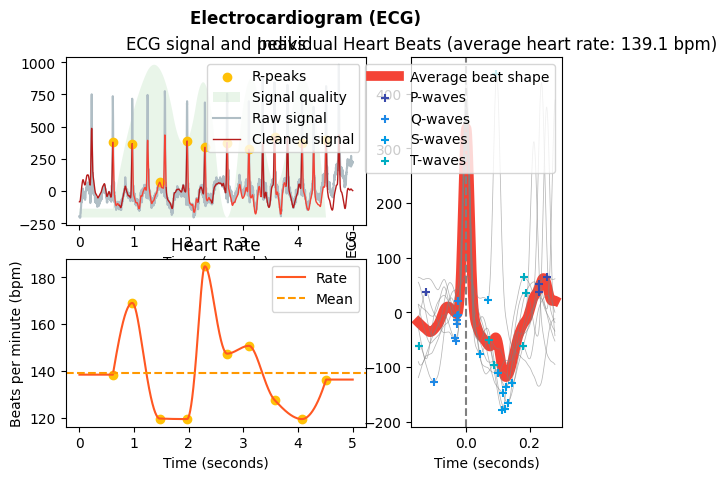

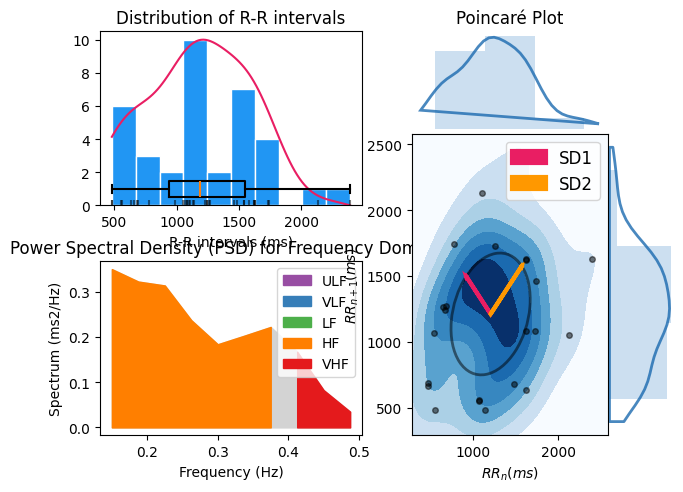

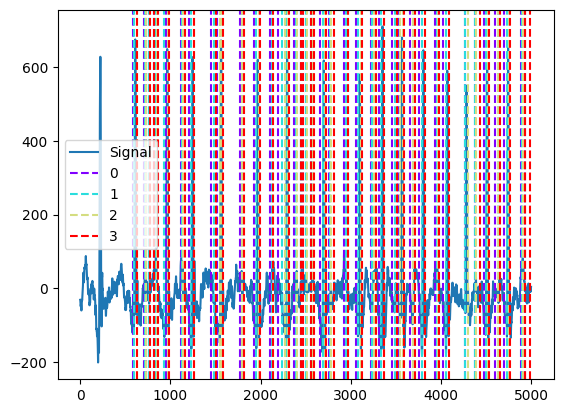

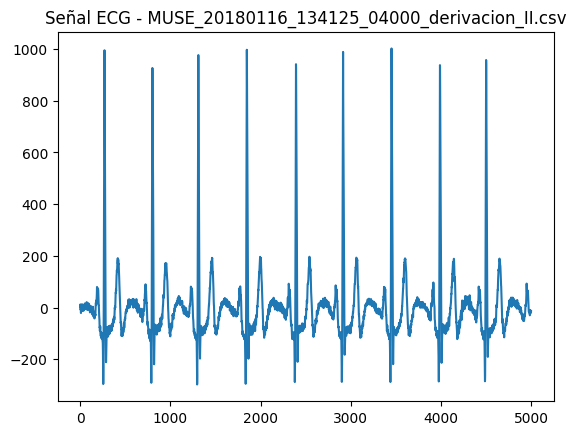

Información del procesamiento para MUSE_20180116_134125_04000_derivacion_II.csv:
{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 803, 1312, 1850, 2395, 2916, 3454, 3991, 4503]), 'ECG_R_Peaks_Uncorrected': array([ 803, 1312, 1850, 2395, 2916, 3454, 3991, 4503]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([0.52857143, 0.509     , 0.538     , 0.545     , 0.521     ,
       0.538     , 0.537     , 0.512     ]), 'ECG_fixpeaks_drrs': array([-0.04946273, -0.40892035,  0.60591847,  0.14625618, -0.50144977,
        0.35519359, -0.02089374, -0.52234351]), 'ECG_fixpeaks_mrrs': array([-0.14382218, -0.8542166 ,  0.07953803,  0.1863151 , -0.35955546,
        0.07953803,  0.        , -0.77794727]), 'ECG_fixpeaks_s12': array([-0.40892035, -0.04946273,  0.14625618,  0.60591847,  0.14625618,
       -0.02089374, -0.52234351, -0.02089374]), 'ECG_fixpe

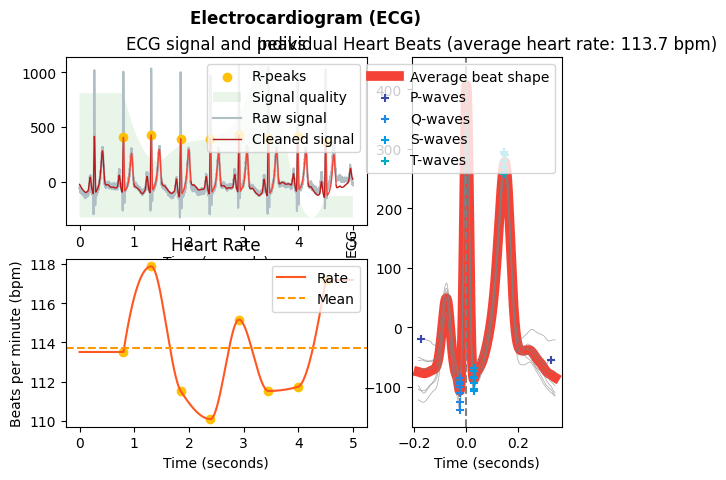

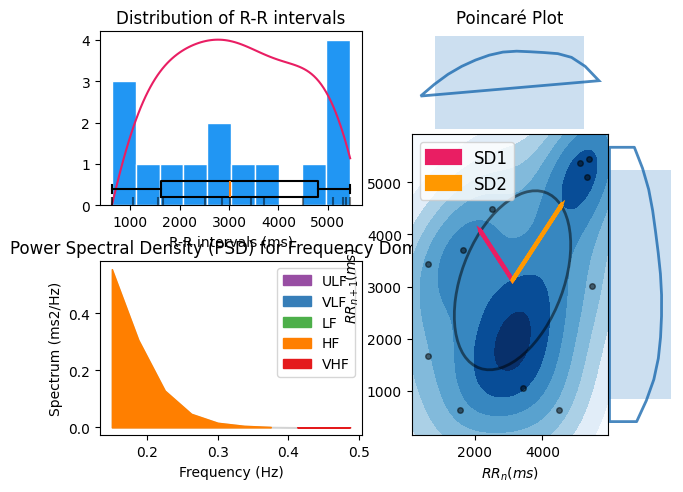

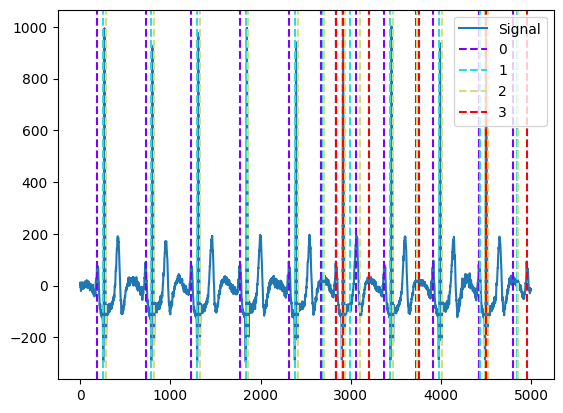

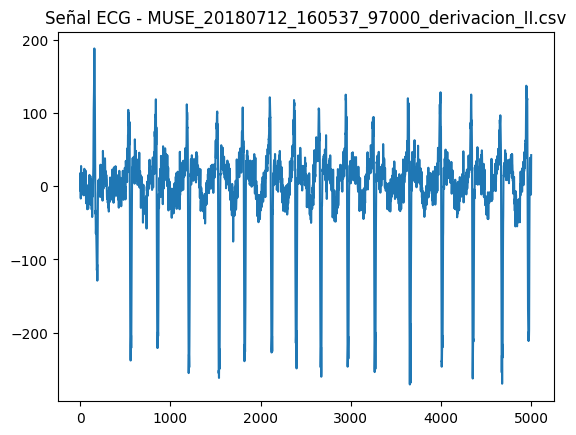

Información del procesamiento para MUSE_20180712_160537_97000_derivacion_II.csv:
{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 533, 1178, 1511, 2095, 2640, 2942, 3631, 3986, 4329, 4649]), 'ECG_R_Peaks_Uncorrected': array([ 533, 1178, 1511, 2095, 2640, 2942, 3631, 3986, 4329, 4649]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([0.45733333, 0.645     , 0.333     , 0.584     , 0.545     ,
       0.302     , 0.689     , 0.355     , 0.343     , 0.32      ]), 'ECG_fixpeaks_drrs': array([-0.02175698,  0.26757919, -0.44485635,  0.35788123, -0.05560704,
       -0.34647466,  0.55179297, -0.47622442, -0.01710986, -0.0327939 ]), 'ECG_fixpeaks_mrrs': array([-0.26857974,  0.30636473, -1.0304067 ,  0.38806199,  0.42533636,
       -0.63825985,  1.02325819,  0.01838188, -0.07352753, -0.17769154]), 'ECG_fixpeaks_s12': array([ 0.26757919, -0.0217569

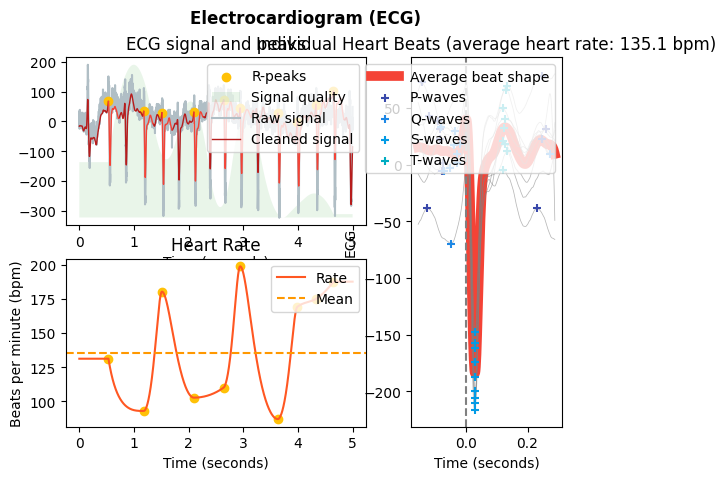

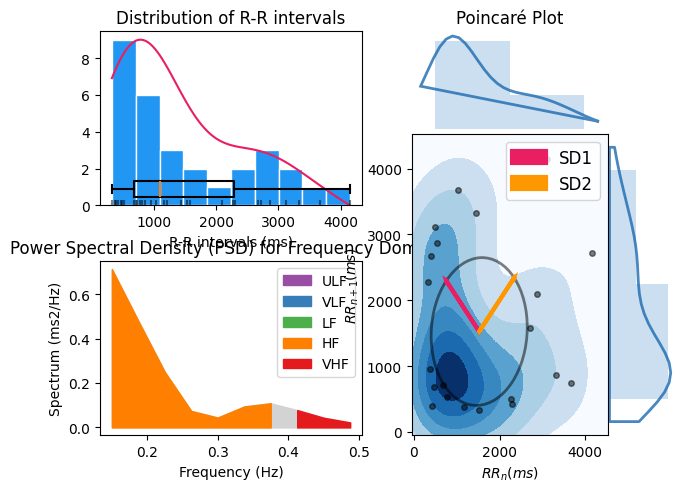

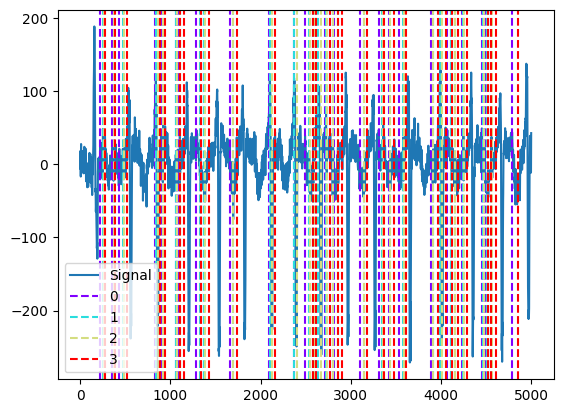

In [119]:

import os
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt

# Ruta a la carpeta que contiene los archivos CSV
carpeta = "Derivacion_II_Filtrados"

# Obtener la lista de archivos en la carpeta
archivos = [f for f in os.listdir(carpeta) if f.endswith('.csv')]

# Recorrer cada archivo y procesar la señal
for archivo in archivos:
    # Leer el archivo CSV
    ruta_archivo = os.path.join(carpeta, archivo)
    ecg_signal = pd.read_csv(ruta_archivo)
    ecg_signal = ecg_signal.values.flatten()
    
    # Limpiar la señal ECG
    ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=100)
    
    # Visualizar la señal
    plt.figure()
    plt.plot(ecg_cleaned)
    plt.title(f"Señal ECG - {archivo}")
    plt.show()
    
    # Procesar la señal ECG
    ecg_signals, info = nk.ecg_process(ecg_signal)
    
    # Visualizar el procesamiento
    nk.ecg_plot(ecg_signals)
    
    print(f"Información del procesamiento para {archivo}:")
    print(info)
    
    # Detección de picos R y cálculo de HRV
    peaks, info = nk.ecg_peaks(ecg_cleaned, sampling_rate=100, correct_artifacts=True)
    hrv_indices = nk.hrv(peaks, sampling_rate=100, show=True)
    
    print(f"Información de picos para {archivo}:")
    print(info)
    
    # Delineación de la señal ECG
    _, rpeaks = nk.ecg_peaks(ecg_cleaned, sampling_rate=100)
    signals, waves = nk.ecg_delineate(ecg_cleaned, rpeaks, sampling_rate=100)
    nk.events_plot([waves["ECG_P_Peaks"], waves["ECG_Q_Peaks"], waves["ECG_S_Peaks"], waves["ECG_T_Peaks"]], ecg_cleaned)
  



5. Con las características que extrae el neurokit y las discutidas en el punto 1 generar un conjunto de características para el presente trabajo. Incluir la característica de frecuencia de potencia máxima del Proyecto 3 (10%). No incluir más de 15 características ni menos de 5, justificar la selección (5%).



Inicialmente podemos obtener que caracteristicas extra neurokit de la siguiente manera:

In [120]:
for i in info.keys():
    print(i)

method_peaks
method_fixpeaks
ECG_R_Peaks
ECG_R_Peaks_Uncorrected
ECG_fixpeaks_ectopic
ECG_fixpeaks_missed
ECG_fixpeaks_extra
ECG_fixpeaks_longshort
ECG_fixpeaks_method
ECG_fixpeaks_rr
ECG_fixpeaks_drrs
ECG_fixpeaks_mrrs
ECG_fixpeaks_s12
ECG_fixpeaks_s22
ECG_fixpeaks_c1
ECG_fixpeaks_c2
sampling_rate


En el articulo se mencionan de manera importante los siguientes fragmentos del ECG:
1. Onda P: Representa el proceso de despolarización auricular.
2. Onda T: Representa la repolarización ventricular.
3. Complejo QRS: Representa el proceso de despolarización ventricular, de este complejo además se mencionan caracteristicas como duración y prominencia, que son relevantes para una clasificación.
4. Se mencionan varios intervalos entre ondas, como QT, PR o RR.
5. Se menciona que medir la relación entre altura y anchura del complejo QRS puede también ser de utilidad.

Tomando en cuenta lo anterior, tomaremos entonces varias caracteristicas del complejo QRS y además de algunos intervalos entre otras ondas, se tomará lo siguiente:

1. Duración de QRS: Representa el tiempo de despolarización del ventriculo, medido en ms.
2. Intervalo QT: Iría desde el Q representando el inicio de la despolarización y el T que representará la repolarización ambas del ventriculo, este estará en ms.
3. Intervalo RR: Básicamente este representa el tiempo en ms promedio del ciclo.
4. Prominencia del complejo QRS: Se refiere a la altura del pico del complejo en relación con sus contornos, o dicho de otra manera es la "fuerza" relativa de este complejo respecto a los picos de su alrededor.
5. Relación alto/ancho del complejo QRS.

De las anteriormente mencionadas caracteristicas se tomará la media y coeficiente de variación de las 5, dando un total de 10 caracteristicas, que serían un total de 11 con las frecuencias de máxima potencia.

6. Crear una rutina que aplique sobre todos los archivos de la base de datos la rutina 5 y almacene los resultados en un dataframe:

Para hacer esto primero definiremos una función para calcular las 10 caracteristicas (las 5 medias y 5 coeficientes de variación)

In [121]:
import numpy as np
import pandas as pd

def calcularCaracteristicas(senal: np.ndarray, sampling_rate: int = 500) -> tuple[float]:
    '''
        Calcularemos las diferentes caracteristicas y se retornarán en un DF.
        Debido a que el sampling rate es por defecto en la BD que usaremos de 500
        ese será el valor que por defecto tomará.
    '''
    try:
        _, info = nk.bio_process(senal, sampling_rate= sampling_rate)
    except ZeroDivisionError: # No se de donde viene este error...
        return False
    except ValueError: # Dice que el tamaño de los datos es muy pequeño y por eso no se puede
        return False

    # Primero duración QRS
    picosQ = np.array(info['ECG_Q_Peaks'])
    picosQ = picosQ[~np.isnan(picosQ)]/info['sampling_rate']
    picosS = np.array(info['ECG_S_Peaks'])
    picosS = picosS[~np.isnan(picosS)]/info['sampling_rate']
    maxL = min(picosS.size, picosQ.size)
    duracionQRS = picosQ[:maxL] - picosS[:maxL]
    mQRS, stdQRS = np.mean(duracionQRS), np.std(duracionQRS)
    cvQRS = stdQRS/mQRS
    
    # Segundo la duración del intervalo QT
    
    picosT = np.array(info['ECG_T_Peaks'])
    picosT = picosT[~np.isnan(picosT)]/info['sampling_rate']
    maxL = min(picosT.size, picosQ.size)
    duracionQT = picosT[:maxL]-picosQ[:maxL]
    mQT, stdQT = np.mean(duracionQT), np.std(duracionQT)
    cvQT = stdQT/mQT

    # Intervalo RR
    
    picosR = np.array(info['ECG_R_Peaks'])
    picosR = picosR[~np.isnan(picosR)]/info['sampling_rate']
    duracionRR = np.array([picosR[i+1]-picosR[i] for i in range(picosR.size-1)])
    mRR, stdRR = np.mean(duracionRR), np.std(duracionRR)
    cvRR = stdRR/mRR
    
    # Prominencia del complejo QRS
    # Este es mas complejo, para calcularlo tomaremos el valle final al pico R y restaremos el pico R con su valle.
    # Este proceso es siguiendo la imagen mostrada en la siguiente celda
    stop = 0
    vallesR = np.array(info['ECG_R_Offsets'])
    convertToInt = np.vectorize(lambda x: int(x))
    picosR = np.array(info['ECG_R_Peaks'])
    posiciones = ~np.isnan(vallesR) & ~np.isnan(picosR)
    if (not bool(set(~np.isnan(vallesR)) - {False})):
        vallesR = np.array(info['ECG_R_Onsets'])
        posiciones = ~np.isnan(vallesR) & ~np.isnan(picosR)
        if (not bool(set(~np.isnan(vallesR)) - {False})):
            stop = 1
            mProm, cvProm = np.nan, np.nan
    if stop == 0:  
        picosR2 = convertToInt(picosR[posiciones])
        vallesR = convertToInt(vallesR[posiciones])
        picosRV = senal[picosR2]
        vallesRV = senal[vallesR]
        prominencias =  picosRV - vallesRV
        mProm, stdProm = np.mean(prominencias), np.std(prominencias)
        cvProm = stdProm/mProm
    
    # Relacion alto/ancho del complejo QRS
    # Tambien utilizando la imagen de la siguiente celda, pero utilizaremos como el ancho
    # La resta de las posiciones de los dos valles
    vallesR1 = np.array(info['ECG_R_Offsets'])
    vallesR2 = np.array(info['ECG_R_Onsets'])
    posiciones = ~np.isnan(vallesR2) & ~np.isnan(vallesR1)
    if (set(posiciones) - {False}):
        vallesR1 = vallesR1[posiciones]/info['sampling_rate']
        vallesR2 = vallesR2[posiciones]/info['sampling_rate']
        picosR2 = convertToInt(picosR[posiciones])
        picosRV = senal[picosR2]
        anchos = vallesR1 - vallesR2
        relacionAA = picosRV/anchos
        mAA, stdAA = np.mean(relacionAA), np.std(relacionAA)
        cvAA = stdAA/mAA      
    else:
        mAA, cvAA = np.nan, np.nan  
    
    return mQRS, cvQRS, mQT, cvQT, mRR, cvRR, mProm, cvProm, mAA, cvAA


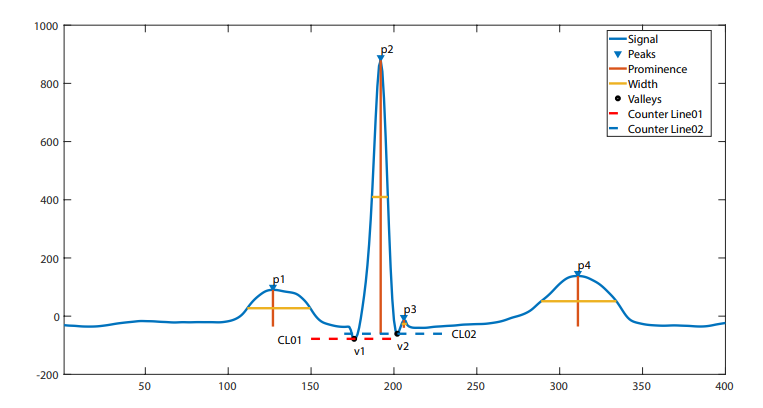

In [122]:
calcularCaracteristicas(ecg_cleaned, 100)

(-0.11166666666666548,
 -0.581323644601513,
 0.5862499999999994,
 0.38862358182190376,
 1.90625,
 0.7824103176867047,
 45.90266499774261,
 1.392097393927929,
 245.97548125790044,
 0.8461107721059262)

Ahora hay que traer los resultados del proyecto 2 y los valores de frecuencia máxima incluirlos aqui.

In [123]:
p2data = pd.read_csv('../Proyecto_2/datos.csv', header = 0, index_col = 0)
p2data.head()

patologia  MFrecuencia  NFrecuencias
MUSE_20180111_155154_74000      AFIB          9.7         31044
MUSE_20180111_155203_15000      AFIB          2.7         34160
MUSE_20180111_155758_17000        SB          3.7          8482
MUSE_20180111_155839_67000        SB          2.9         19772
MUSE_20180111_155859_36000        SB          2.8         21063

In [124]:
diagnostics_path = '../Proyecto_3/Diagnostics.xlsx'
diagnostics_df = pd.read_excel(diagnostics_path)
diagnostics_df.head()

FileName Rhythm       Beat  PatientAge  Gender  \
0  MUSE_20180113_171327_27000   AFIB   RBBB TWC          85    MALE   
1  MUSE_20180112_073319_29000     SB        TWC          59  FEMALE   
2  MUSE_20180111_165520_97000     SA       NONE          20  FEMALE   
3  MUSE_20180113_121940_44000     SB       NONE          66    MALE   
4  MUSE_20180112_122850_57000     AF  STDD STTC          73  FEMALE   

   VentricularRate  AtrialRate  QRSDuration  QTInterval  QTCorrected  RAxis  \
0              117         234          114         356          496     81   
1               52          52           92         432          401     76   
2               67          67           82         382          403     88   
3               53          53           96         456          427     34   
4              162         162          114         252          413     68   

   TAxis  QRSCount  QOnset  QOffset  TOffset  
0    -27        19     208      265      386  
1     42         8     215      261      431  
2     20        11     224      265      415  
3      3         9     219      267      447  
4    -40        26     228      285      354

In [125]:
sbyafib_df=diagnostics_df[diagnostics_df['Rhythm'].isin(['AFIB', 'SB'])]
needed_files = sbyafib_df['FileName'].tolist()

In [126]:
ruta = r'D:\Descargas\ECGDataDenoised (1)\ECGDataDenoised'

In [127]:
import os
import warnings
warnings.filterwarnings("ignore")

def fullDF(ruta: str, needed: list[str], diag: pd.DataFrame, oldDF: pd.DataFrame) -> pd.DataFrame:
    dfOut = pd.DataFrame(columns = ['Rythm','MFreq','mQRS', 'cvQRS', 'mQT', 'cvQT', 'mRR', 'cvRR', 'mProm', 'cvProm', 'mAA', 'cvAA'])
    datos = [i for i in os.listdir(ruta) if i.split('.csv')[0] in needed]
    for dato in datos:
        filaDiag = diag[diag.FileName == dato.split('.csv')[0]]
        MFreq = oldDF[oldDF.index == dato.split('.csv')[0]].MFrecuencia[0]
        rythm = filaDiag.Rhythm.iloc[0]
        dirs = os.path.join(ruta, dato)
        df = pd.read_csv(dirs, names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])['II']
        result = calcularCaracteristicas(df)
        if result == False:
            continue
        mQRS, cvQRS, mQT, cvQT, mRR, cvRR, mProm, cvProm, mAA, cvAA = result
        dfOut.loc[dato.split('.csv')[0]] = [rythm, MFreq, mQRS, cvQRS, mQT, cvQT, mRR, cvRR, mProm, cvProm, mAA, cvAA]
    return dfOut
        
dfFinal = fullDF(ruta, needed_files, diagnostics_df, p2data)

In [10]:
dfFinal.to_csv('datosP4.csv')
dfFinal.head()

Rythm  MFreq      mQRS     cvQRS       mQT  \
MUSE_20180111_155154_74000  AFIB    9.7  1.379667  1.263251 -1.235000   
MUSE_20180111_155203_15000  AFIB    2.7  1.217714  0.990619 -1.071714   
MUSE_20180111_155758_17000    SB    3.7 -0.136500 -0.077790  0.304250   
MUSE_20180111_155839_67000    SB    2.9 -0.103333 -0.195687  0.366000   
MUSE_20180111_155859_36000    SB    2.8 -0.155750 -0.244524  0.368750   

                                cvQT       mRR      cvRR        mProm  \
MUSE_20180111_155154_74000 -1.398001  0.548375  0.162345   497.452395   
MUSE_20180111_155203_15000 -1.147194  1.014222  0.267457   700.143534   
MUSE_20180111_155758_17000  0.003941  1.083750  0.022421  1053.677500   
MUSE_20180111_155839_67000  0.063726  1.036000  0.014730   374.332432   
MUSE_20180111_155859_36000  0.102906  1.079000  0.016159   549.661000   

                              cvProm          mAA      cvAA  
MUSE_20180111_155154_74000  0.258800  2183.039079  0.526305  
MUSE_20180111_155203_15000  0.050799  4167.497780  0.107920  
MUSE_20180111_155758_17000  0.026529  2999.475466  0.015586  
MUSE_20180111_155839_67000  0.043511  2080.099070  0.246875  
MUSE_20180111_155859_36000  0.013278  2643.168536  0.353851

In [173]:
import numpy as np

In [174]:
dfFinal = pd.read_csv('datosP4.csv', index_col = 0)

In [175]:
dfFinal.shape

(5664, 12)

In [176]:
dfFinal.isna().sum()

Rythm       0
MFreq       0
mQRS       96
cvQRS      96
mQT       122
cvQT      122
mRR         0
cvRR        0
mProm       5
cvProm      5
mAA       262
cvAA      262
dtype: int64

Ahora luego de obtener los datos notamos 2 cosas, la primera es que existen unicamente 5664 filas, cuando originalmente eran 5669 datos, esto es porque algunos datos tuvieron problemas al importarlos a la librería.

Luego también podemos observar que algunas columnas tienen valores NaN, esto es porque simplemente no se pudo calcular el valor para ese, debido a que, por ejemplo, algunos valores se obtenian como np.nan, y estos al realizar los calculos, por ejemplo, de medias o cv, se obtenian valores de np.nan, dando como resultado esos valores.

Podemos tratarlos convirtiendolos en las medias de su clasificación, o sea, la media de los valores de AFIB para todos los valores de AFIB de dicha columna que sean nan, y lo mismo con los de SB, o también podrian ser simplemente eliminados con un dropna, que nos dejaría con 5396 columnas, 1572 de AFIB y 3824 de SB, pero todos con sus datos.

In [177]:
np.unique(dfFinal.dropna()['Rythm'], return_counts = True) 

(array(['AFIB', 'SB'], dtype=object), array([1572, 3824], dtype=int64))

In [178]:
dfFinal.shape

(5664, 12)

In [179]:
dfFinal = dfFinal.dropna()
dfFinal.shape

(5396, 12)

7. Código y análisis de resultados, donde se discutan por los menos tres diferentes arquitecturas de red (10%) y las matrices de confusión obtenidas (10%), de una red neuronal que permita la clasificación de las dos patologías cardiacas.

Existen diferentes arquitecturas de red neuronal con diferentes objetivos a cumplir, en este caso analizaremos 3 arquitecturas:
* Red neuronal convolucional
* Perceptrón simple
* Perceptrón multicapas

**RED NEURONAL CONVOLUCIONAL**

Este es un tipo de red neuronal que trabaja normalmente con imagenes o señales de audio, ya que necesita tipos de dato especifico, utiliza capas convolucionales que son capaces de detectar las caracteristicas locales de los datos, normalmente cosas como bordes o formas de las imagenes.

También se pueden utilizar para hacer clasificaciones, pero estas son mas dificiles de usar en estos casos, ya que estan optimizadas para otro tipo de datos que son mas de tipo rejilla.

In [190]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = np.random.rand(1000, 10)  
y = np.random.randint(0, 2, size=(1000,)) 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = X_scaled.reshape((X_scaled.shape[0], 10, 1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = models.Sequential([
    layers.Conv2D(32, (3, 1), activation='relu', input_shape=(10, 1, 1)),  
    layers.MaxPooling2D((2, 1)),  
    layers.Conv2D(64, (3, 1), activation='relu'),  
    layers.MaxPooling2D((2, 1)),  
    layers.Flatten(),  
    layers.Dense(64, activation='relu'),  
    layers.Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Accuracy: {test_acc}')


C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5282 - loss: 0.6952
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5408 - loss: 0.6868
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5686 - loss: 0.6838
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5711 - loss: 0.6857
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5729 - loss: 0.6764
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6076 - loss: 0.6713
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5677 - loss: 0.6720
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5817 - loss: 0.6763
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6430 - loss: 0.6539
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5979 - loss: 0.6599
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4235 - loss: 0.7666 
Accuracy: 0.4399999976158142


Este es un ejemplo de uso, mas no se pudo implementar el modelo de redes convolucionales para los datos obtenidos en el proceso anterior.

**PERCEPTRON SIMPLE**

El perceptrón simple es una neurona artificial, es el modelo matemático que compone las redes neuronales y es principalmente un modelo matemático que intenta asemejarse a una neurona biológica, toma entradas multiples y combinando de manera ponderada los pesos obtiene un valor de salida pasando el valor obtenido por una función de activación que entrega una salida por lo general binaria.

In [180]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from math import sqrt
from sklearn.metrics import r2_score
import seaborn as sns

X = dfFinal.drop('Rythm', axis=1)  
y = dfFinal['Rythm']  

y = y.map({'AFIB': 0, 'SB': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Perceptron()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

print(f'Test: {accuracy_score(y_train, y_pred_train)}')
print(f'Test: {accuracy_score(y_test, y_pred)}')

Test: 0.9311622981202012
Test: 0.9332921556516368


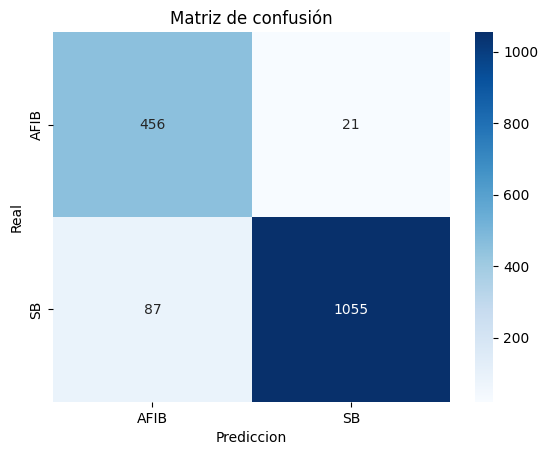

In [181]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels=["AFIB", "SB"], yticklabels=["AFIB", "SB"])
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.show()

**PERCEPTRON MULTICAPAS**

El perceptrón multicapas es una extensión del modelo anterior, utiliza multiples capas de neuronas y son capaces de aprender representaciones no lineales de los datos, a diferencia de un perceptrón simple, esto lo hace mas flexible y potente.

Consta de capas de entrada, capas ocultas y capas de salida, que respectivamente reciben las caracteristicas, las procesan y luego predicen un resultado. Tal y como el perceptrón, este pondera caracteristicas asignandole pesos, pero cada perceptrón unico en esta red genera sus propios pesos.

In [182]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [183]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=1000)
print(mlp)

MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=1000)


In [184]:
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
acurracy1 = accuracy_score(y_pred=predict_train, y_true=y_train)
predict_test = mlp.predict(X_test)
acurracy2 = accuracy_score(y_pred=predict_test, y_true=y_test)


In [185]:
print(f'''
    Train: {acurracy1*100:0.3f}%
    Test: {acurracy2*100:0.3f}%
      ''')


    Train: 97.908%
    Test: 96.912%
      


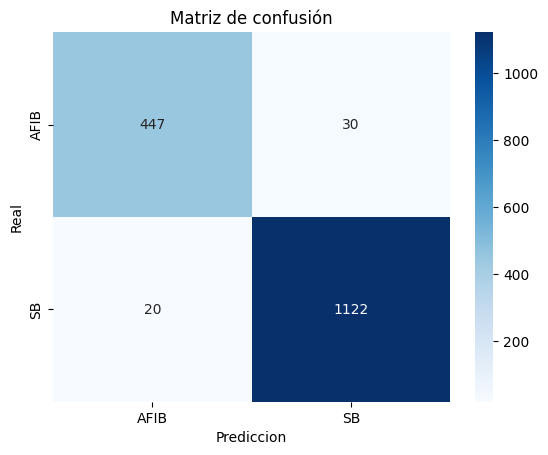

In [186]:
cm = confusion_matrix(y_test, predict_test)

plt.figure()
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels=["AFIB", "SB"], yticklabels=["AFIB", "SB"])
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.show()

**ANALISIS DE LOS RESULTADOS OBTENIDOS**

A primera vista se observa que tanto el perceptrón simple como el multicapas son realmente los unicos que permitieron obtener un valor de clasificación para el problema de enfermedades cardiacas, es importante notar también que estos dos aunque son escencialmente compuestos por el mismo modelo matemático, el perceptrón simple tiene un mayor efecto en sistemas cuyo resultado puede tender mas a la linealidad, el perceptrón multicapas permite mas facilmente clasificar al tener una gran cantidad de columnas porque puede tomar relaciones no lineales y convertirlas en resultados, siendo entonces mas potente, mas flexible y con resultados mejores. Aún asi ambos obtuvieron resultados bastante buenos en este caso.

Finalmente se observa que, tanto el perceptrón como el perceptrón multicapas obtuvieron resultados bastante buenos, mayores al 90% en la predicción de los resultados, especialmente se puede notar que en ambos casos las matrices de confusión obtenidas a partir de los resultados de test tuvieron muy pocos falsos positivos.

Aún asi el modelo con mejor resultado obtenido fué el perceptrón multicapas, que obtuvo aunque por poco, un 3% mas de acurracy respecto al perceptrón simple, pero para ambos, el numero de falsos positivos no alcanzó nisiquiera a los 100 de aproximadamente 1500 datos.

8. Consultar cómo funciona, realizar y discutir un ejemplo con los datos, del algoritmo de K means (10%) y máquinas de soporte vectorial (SVM) (10%)

**K- means**

El algoritmo K-means es un algoritmo de aprendizaje no supervisado utilizado principalmente para la agrupación (clustering) de datos. Su objetivo es dividir un conjunto de datos en un número específico de grupos (o clusters) basándose en sus características similares. Estos grupos son formados de manera que los elementos dentro de cada grupo sean lo más similares posible entre sí, mientras que los grupos sean lo más diferentes posible entre ellos.

Consideraciones:
Elección de K: Uno de los desafíos del algoritmo es determinar cuántos grupos (K) usar. Hay métodos, como el método del codo, que pueden ayudar a encontrar un valor apropiado para K.
Sensibilidad a la inicialización: La elección inicial de los centroides puede afectar el resultado final. A menudo, el algoritmo se ejecuta varias veces con diferentes inicializaciones para encontrar el mejor resultado.
Esfericidad de los clusters: K-means asume que los clusters tienen una forma esférica, por lo que no es adecuado para datos con formas de clusters no esféricas.[3]

*EJEMPLO*
1. Importar las bibliotecas necesarias:

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


2. Cargar y preparar los datos:

In [ ]:

dfFinal = pd.read_csv('datosP4.csv') 

df = dfFinal.dropna()

# Separar las características
X = df[['MFreq', 'mQRS', 'mRR' ]]


3. Estandarizar las caracteristicas

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

4. Aplicar el algoritmo K-Means:
Primero, se debe determinar el número óptimo de clusters.Se el método del codo para esto.

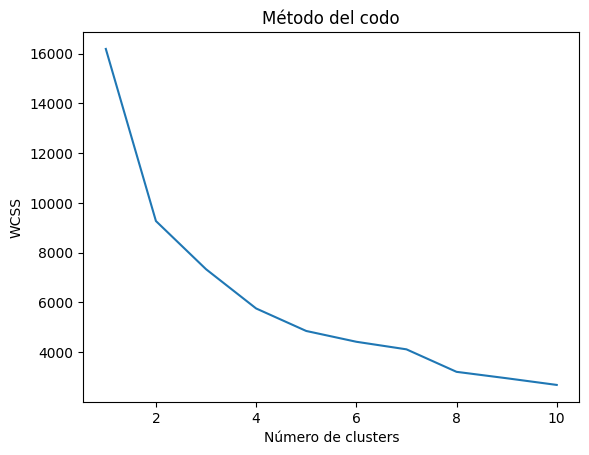

In [ ]:
# Método del codo para encontrar el número óptimo de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

5. Entrenar el modelo K-Means con el número óptimo de clusters:
En este caso 2

In [ ]:
# Entrenar el modelo K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Obtener las etiquetas de los clusters
labels = kmeans.labels_

# Agregar las etiquetas de los clusters al DataFrame original
df['Cluster'] = labels

# Mostrar el DataFrame con los clusters
print(df)


                      Unnamed: 0 Rythm  MFreq      mQRS     cvQRS       mQT  \
0     MUSE_20180111_155154_74000  AFIB    9.7  1.379667  1.263251 -1.235000   
1     MUSE_20180111_155203_15000  AFIB    2.7  1.217714  0.990619 -1.071714   
2     MUSE_20180111_155758_17000    SB    3.7 -0.136500 -0.077790  0.304250   
3     MUSE_20180111_155839_67000    SB    2.9 -0.103333 -0.195687  0.366000   
4     MUSE_20180111_155859_36000    SB    2.8 -0.155750 -0.244524  0.368750   
...                          ...   ...    ...       ...       ...       ...   
5659  MUSE_20180712_161449_58000  AFIB   12.4  1.912800  0.741860 -1.440400   
5660  MUSE_20180712_161451_72000  AFIB    3.9  2.381111  0.406071 -2.234889   
5661  MUSE_20180712_161452_78000  AFIB    3.2  0.319429  1.697008 -0.124571   
5662  MUSE_20180712_161503_00000  AFIB    4.1  0.906889  0.658773 -0.742667   
5663  MUSE_20180712_161505_16000  AFIB    2.6 -0.252857 -0.233601  2.226800   

          cvQT       mRR      cvRR        mProm    

C:\Users\andre\AppData\Local\Temp\ipykernel_12644\662551144.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = labels


6. Analizar los resultados:

Cluster
0    3946
1    1450
Name: count, dtype: int64


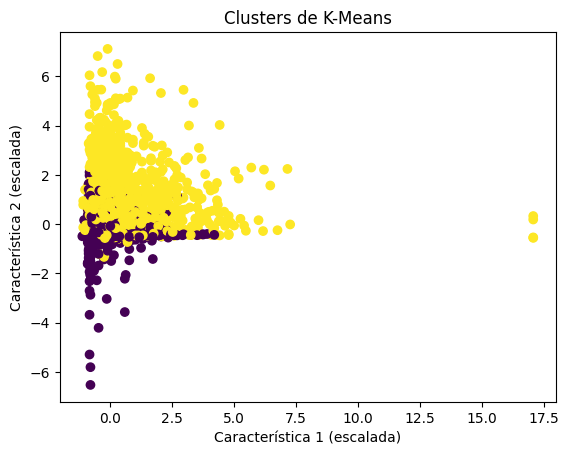

In [ ]:
# Ver la distribución de los clusters
print(df['Cluster'].value_counts())

# Opcional: Visualización en 2D (si tienes más de 2 características, puedes usar PCA para reducir la dimensionalidad)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title('Clusters de K-Means')
plt.xlabel('Característica 1 (escalada)')
plt.ylabel('Característica 2 (escalada)')
plt.show()


Se obtiene el rendimiento del modelo utilizando la puntuacion de silueta 
La puntuación de silueta es una métrica que mide lo bien que los puntos están asignados a sus respectivos clusters en comparación con otros clusters. La puntuación varía entre -1 y 1:

* 1 significa que los puntos están muy bien agrupados.

* 0 indica que los puntos están en el límite entre dos clusters.

* -1 significa que los puntos probablemente deberían pertenecer a otro cluster.

In [ ]:
from sklearn.metrics import silhouette_score

# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(X_scaled, labels)
print(f'Coeficiente de Silueta: {silhouette_avg}')


Coeficiente de Silueta: 0.5477372693695014


**Máquina de soporte vectorial**

Las máquinas de soporte vectorial (SVM) son un tipo de modelo de aprendizaje supervisado utilizado principalmente para tareas de clasificación, aunque también pueden ser aplicadas para regresión. El principio básico de SVM es encontrar el hiperplano (en 2D, una línea) que mejor separe las clases en los datos.

Cómo funciona SVM:
* Separación de clases: SVM busca encontrar un hiperplano que separe los datos de diferentes clases con el mayor margen posible. El margen es la distancia entre el hiperplano y los puntos de datos más cercanos de cada clase. Esos puntos más cercanos se conocen como vectores de soporte.

* Caso lineal: Si los datos son linealmente separables, SVM encuentra un hiperplano que divide los puntos de una clase de los de otra clase sin error.

* Caso no lineal: Si los datos no son linealmente separables, SVM utiliza un truco conocido como kernel trick. Este truco mapea los datos de un espacio de menor dimensión a uno de mayor dimensión (donde los datos pueden volverse separables), y luego aplica el mismo principio de encontrar un hiperplano.

* Maximización del margen: SVM no solo se preocupa por la correcta clasificación de los puntos, sino que busca maximizar el margen entre las clases. Cuanto mayor sea el margen, mejor será la generalización del modelo a nuevos datos.

Importamos las librerias

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix



2. Cargamos y preparamos los datos

In [ ]:

dfFinal = pd.read_csv('datosP4.csv') 
# Mostrar el número de valores faltantes en cada columna
print(dfFinal.isnull().sum())

# Opcional: Eliminar filas con NaN
df = dfFinal.dropna()

# Separar características y etiquetas
X = df[['MFreq', 'mQRS', 'cvQRS', 'mQT', 'cvQT', 'mRR', 'cvRR', 'mProm', 'cvProm', 'mAA', 'cvAA']]
y = df['Rythm']



Unnamed: 0      0
Rythm           0
MFreq           0
mQRS           96
cvQRS          96
mQT           122
cvQT          122
mRR             0
cvRR            0
mProm           5
cvProm          5
mAA           262
cvAA          262
dtype: int64


3. Dividir los datos en conjuntos de entrenamiento y prueba:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


4. Estandarizar las características:

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

5. Entrenar el modelo SVM

In [ ]:
model = SVC(kernel='linear') 
model.fit(X_train, y_train)

SVC(kernel='linear')

6. Evaluar el modelo

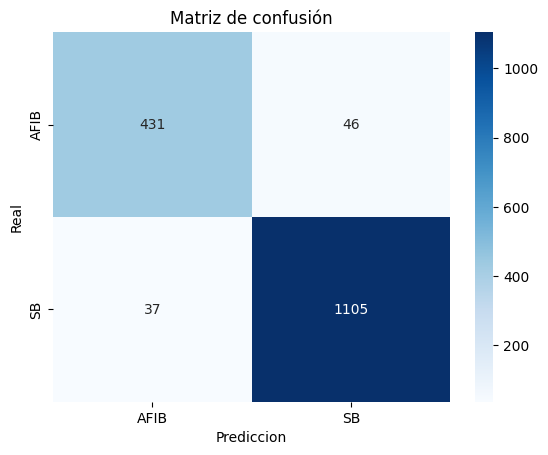

In [ ]:
# Predicción
y_pred = model.predict(X_test)

# Evaluación
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels=["AFIB", "SB"], yticklabels=["AFIB", "SB"])
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.show()

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report)

AFIB           SB  accuracy    macro avg  weighted avg
precision    0.920940     0.960035  0.948734     0.940487      0.948516
recall       0.903564     0.967601  0.948734     0.935582      0.948734
f1-score     0.912169     0.963803  0.948734     0.937986      0.948590
support    477.000000  1142.000000  0.948734  1619.000000   1619.000000

**RESULTADOS OBTENIDOS**

Finalmente es notorio que los resultados obtenidos son bastante buenos, si bien el acurracy obtenido no alcanza a superar al perceptrón multicapas, estos resultados siguen siendo bastante buenos, hay que tener en cuenta la diferencia importante de funcionamiento también, un perceptrón multicapas busca relaciones no lineales para dar pesos y con un resultado final clasificar a través de una función de activación, en cambio, una maquina de soporte vectorial funciona separando espacios en un hiperplano para definir cuales espacios pertenecen a que categoria, clasificando dependiendo del espacio en el que quede.

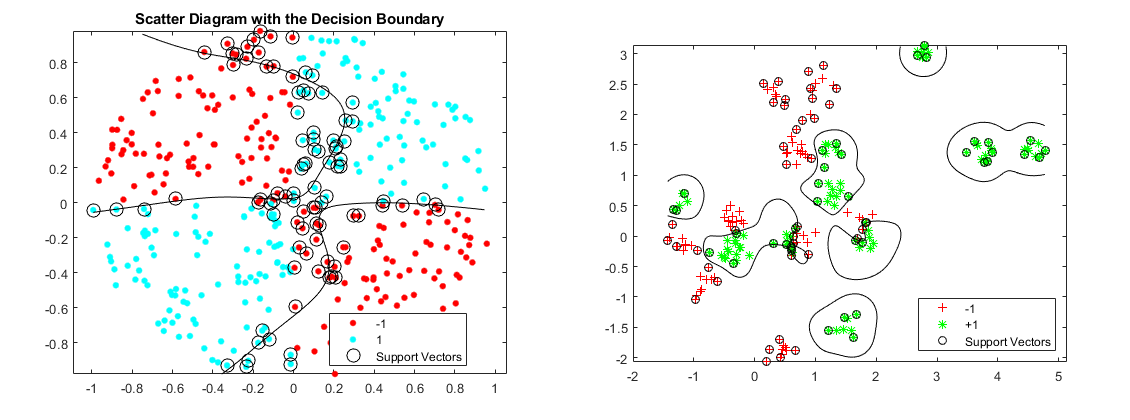

Podemos ver con la imagen proporcionada, que lo que busca es entregar estos resultados basandose en la posición, pero igual la imagen proporcionada también muestra que, en la busqueda de las mejores fronteras sin generar un overfitting es probable que algunos falsos positivos se generen al quedar dentro de espacios que no les pertenecen, lo cual al realizar una prueba con datos de test, seguirá sucediendo.

## **Bibliografía**

[1] A method for detection of atrial fibrillation using RR intervals. (2000). IEEE Conference Publication | IEEE Xplore. https://ieeexplore.ieee.org/document/898539

[2]  Jarvis S (2021) Electrocardiogram 3: cardiac rhythm and conduction abnormalities. Nursing Times [online]; 117: 8, 27-32. https://cdn.ps.emap.com/wp-content/uploads/sites/3/2021/07 210728-Electrocardiogram-3-cardiac-rhythm-and-conduction-abnormalities1.pdf

[3] Barrios, A. (2023, August 9). Tutorial del Algoritmo K-Means en Python - LatinXinAI - Medium. Medium. https://medium.com/latinxinai/tutorial-del-algoritmo-k-means-en-python-d8055751e2f3
